An example of intializing and running an episode of the current market implementation

In [38]:
import matplotlib.pyplot as plt
from market_model import Market

In [39]:
N = 5000 # 100 is pretty small
alpha = 1.01 # determined from data
p = 0.0154 # fixed value used determined by another paper
M = 100 # supposedly any value 50-500 is fine
delta_R = 3 # value used in paper can also be determined from data
t_end = 100

market = Market(N,alpha, p, M,t_end, delta_R)

Initializing Market


In [40]:
market.run_market()

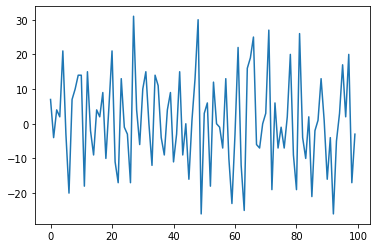

In [41]:
plt.plot(market.return_hist)

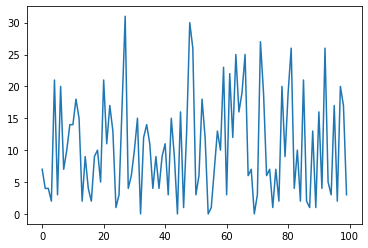

In [42]:
plt.plot(market.volatility_hist)

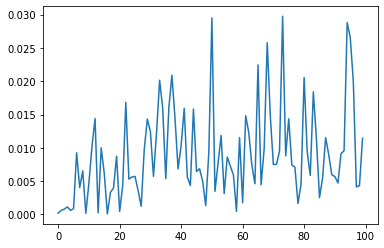

In [43]:
plt.plot(market.herding_hist)

In [44]:
import numpy as np
import utility

Text(0.5, 0, 't (day)')

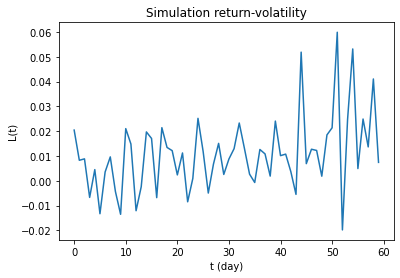

In [45]:
t_end = 60
ret_vol_cor=np.zeros(t_end)
for i in range(t_end):
    ret_vol_cor[i] = utility.calc_L(market.return_hist,i)
plt.plot(ret_vol_cor)
plt.title("Simulation return-volatility")
plt.ylabel("L(t)")
plt.xlabel("t (day)")